# Ford GoBike System Data, March 2020
## by Seongsu Park

## Preliminary Wrangling

> This data is provided according to the Bay Wheels License Agreement, working with the transport corporate, Lyft, together.
> The data is the usage of GoBike in San Francisco, USA.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

> The **COVID-19** situation makes peoople stay indoor, which can enormously affect the GoBike business. We need to understand how people tend to use this service especially on **March, 2020**.

In [2]:
#import the dataset, append into one dafa frame, and reverse all the value due to date orders
df1 = pd.read_csv('tripdata_202003.csv')
df2 = pd.read_csv('tripdata_202002.csv')
df3 = pd.read_csv('tripdata_202001.csv')
df = df1.append([df2, df3])
df = df.iloc[::-1]
df.head()

C:\Users\pss21\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


duration_sec           start_time             end_time  \
295853          6477  2020-01-04 15:11:49  2020-01-04 16:59:47   
295852          1735  2020-01-30 23:08:59  2020-01-30 23:37:54   
295851         12530  2020-01-09 13:56:54  2020-01-09 17:25:44   
295850          1328  2020-01-06 12:40:12  2020-01-06 13:02:20   
295849           890  2020-01-26 16:18:12  2020-01-26 16:33:02   

        start_station_id start_station_name  start_station_latitude  \
295853               NaN                NaN               37.811147   
295852               NaN                NaN               37.810575   
295851               NaN                NaN               37.810550   
295850               NaN                NaN               37.810496   
295849               NaN                NaN               37.810492   

        start_station_longitude  end_station_id      end_station_name  \
295853              -122.410889             NaN                   NaN   
295852              -122.410644             NaN                   NaN   
295851              -122.476451           468.0  Grove St at Gough St   
295850              -122.476856             NaN                   NaN   
295849              -122.476752             NaN                   NaN   

        end_station_latitude  end_station_longitude  bike_id   user_type  \
295853             37.797196            -122.434999   282535    Customer   
295852             37.786252            -122.409532   219934  Subscriber   
295851             37.777870            -122.422953   380070  Subscriber   
295850             37.780677            -122.475797   301867  Subscriber   
295849             37.786677            -122.466642   353366    Customer   

       rental_access_method  
295853                  app  
295852                  app  
295851                  app  
295850                  app  
295849                  app

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 905007 entries, 295853 to 0
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             905007 non-null  int64  
 1   start_time               905007 non-null  object 
 2   end_time                 905007 non-null  object 
 3   start_station_id         418705 non-null  float64
 4   start_station_name       419938 non-null  object 
 5   start_station_latitude   905007 non-null  float64
 6   start_station_longitude  905007 non-null  float64
 7   end_station_id           419225 non-null  float64
 8   end_station_name         420499 non-null  object 
 9   end_station_latitude     905007 non-null  float64
 10  end_station_longitude    905007 non-null  float64
 11  bike_id                  905007 non-null  int64  
 12  user_type                905007 non-null  object 
 13  rental_access_method     617858 non-null  object 
dtypes: f

In [4]:
#change the dtype of 'bike_id' to string
df['bike_id'] = df['bike_id'].astype('str')

In [5]:
#change the dtype of 'bike_id' to datetime, month
df['start_time'] = pd.to_datetime(df['start_time'])
df['start_time'] = df['start_time'].dt.month
df['start_time'] = df['start_time'].replace(3, "March")
df['start_time'] = df['start_time'].replace(2, "February")
df['start_time'] = df['start_time'].replace(1, "January")
df = df.drop(df[df.start_time == 4].index)
df['start_time'].value_counts()

February    423081
January     294122
March       182608
Name: start_time, dtype: int64

### What is/are the main feature(s) of interest in your dataset and the structure?

- duration_sec : **'quantitative variable'** amount of the bike usage in second unit. We can use this variable to understand if the long-used bike is differed depending on the user types.

- user_type : **'qualitative variable'**(Subscriber / Customer) types of users who subscribe the gobike or not. We can track if there is a loyalty to this gobike.

- rental_access_method : **'qualitative variable'**(app / clipper) the way of renting the bike. We can use this data if we need to give up advertising the clipper's way.

- start_time : **'qualitative variable'**(March / February / January) the distribution in 2020. We can divide the data by month.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

- It might have been not too useful in the general situation, but in the COVID-19 situation, we need to understand the new trend of the customers since March, 2020. Therefore, rather than comparing the past policies and the trends, we will set up a blank white board and study as the first trial.

- **I want to see the amount change of usage and the trend of using GoBike service since this COVID-19 situation, with the 4 datasets above.**

## Univariate Exploration

### Which time of duration was most popular, short or long?

- **Most of the duration was between 0 to 2,000 sec.**

- The hightes amount of usage was still more than 10,000 people.


- We need to percisely investigate the short time usage (especially upto 2,000 seconds).

- As the amount of users are still more than 10,000, we need to find the way how to supply such amount of bikes.

In [6]:
#build two plots which have the detail content of 'duration_sec' and the total content of 'duration_sec'
plt.subplot(1,2,1)
bins = np.arange(0, df['duration_sec'].max()+5000, 60)
plt.hist(data=df, x='duration_sec', bins=bins)
plt.xlim(0,4000)
plt.xlabel('Duration Second(s)')
plt.ylabel('Number of Values')
plt.title('Variation from 0 to 4000')

#total duration seconds histogram
plt.subplot(1,2,2)
bins = np.arange(0, df['duration_sec'].max()+5000, 5000)
plt.hist(data=df, x='duration_sec', bins=bins)
plt.xlabel('Duration Second(s)')
plt.ylabel('Number of Usage')
plt.title('Total Variation')

plt.tight_layout()

As the data has a lot of outliers, we need to adjusts the data.

In [7]:
df['duration_sec'].describe()

count    899811.000000
mean        806.608180
std        1654.413851
min          60.000000
25%         370.000000
50%         595.000000
75%         932.000000
max      811077.000000
Name: duration_sec, dtype: float64

In [8]:
#omit the outliers in 'duration_sec'
IQR = 932 - 370
Lower_Outlier = 370 - (1.5*IQR)
Higher_Outlier = 932 + (1.5*IQR)
print(Lower_Outlier)
print(Higher_Outlier)
df = df.drop(df[df.duration_sec > Higher_Outlier].index)

-473.0
1775.0


- Therefore, we only take the data from 0 seconds to 1775 seconds in 'duration_sec'.

Text(0.5, 1.0, 'Variation from 0 to 1775 (s)')

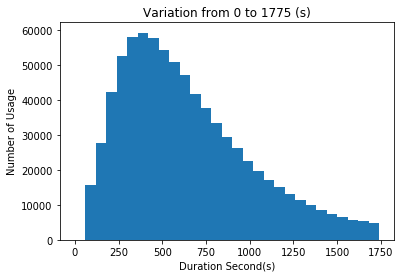

In [9]:
#re-build the histogram of 'duration_sec' without outliers
bins = np.arange(0, Higher_Outlier, 60)
plt.hist(data=df, x='duration_sec', bins=bins)
plt.xlabel('Duration Second(s)')
plt.ylabel('Number of Usage')
plt.title('Variation from 0 to 1775 (s)')

### Which type of users used the GoBike service more?

- More than 60% of the users have **subscribed** the GoBike service.
- We can consider that the subscribing policy of GoBike has the important portion of the sales.

In [10]:
#build the pie chart of 'user_type'
sorted_counts = df['user_type'].value_counts()
labels = sorted_counts.index
plt.pie(sorted_counts, labels=labels, startangle=90, counterclock=False, autopct='%1.1f%%')
plt.legend(labels, loc="best")
plt.axis('square')
plt.title('Type of Users')

Text(0.5, 1.0, 'Type of Users')

### Which way of method was used well among the users?

- More than 90% of the users have used the GoBike service by the **application**, while the clippers only have 7.7%.
- Improving the utility and the design of the application is absolutely important in this service.

In [11]:
#build the pie chart of 'rental_access_method'
sorted_counts = df['rental_access_method'].value_counts()
labels = sorted_counts.index
plt.pie(sorted_counts, labels=labels, startangle=90, counterclock=False, autopct='%1.1f%%')
plt.legend(labels, loc="best")
plt.axis('square')
plt.title('Access Method')

Text(0.5, 1.0, 'Access Method')

### How has the usage of GoBike been changed in each month?

- The number of usage in February is more than 350 hundreds, but the usage in March is less than 150 hundreds.
- As we expected, the number of usage has been **decreased more than half in March.**

Text(0.5, 1.0, 'Usage per month')

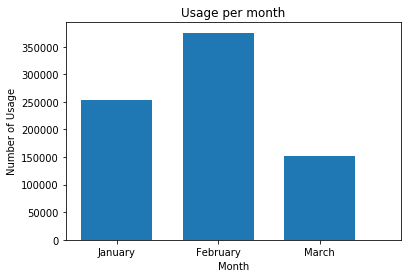

In [12]:
##build the histogram of 'start_time' by months
bins = np.arange(0, 4, 1)
plt.hist(df['start_time'], bins=bins-0.35, width=0.7)
plt.xlabel('Month')
plt.ylabel('Number of Usage')
plt.title('Usage per month')

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> In the duration_sec variable, most of the duration time was distributed between 0 to 2000 seconds(almost 33 mins). It is easy to understand that people do not tend to use bike more than a couple of hours. Therefore, we do not need to perform the transformation, but only need to focus on the short time without **outliers**.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> As the duration_sec has a lot of outliers, I adjusted the data only from 0 to 1775 seconds.

## Bivariate Exploration

### Is there any difference within the duration seconds in each month?
- It is not much clear, but the popular duration has been decreased from February to March.

In [13]:
#build the violin plot using 'duration_sec' and 'start_time'
base_color = sns.color_palette()[0]
sns.violinplot(data = df, x='duration_sec', y='start_time', color=base_color, inner = None)
plt.title('Duration Second(s) per month')
plt.xlabel('Duration Second(s)')
plt.ylabel('Month')

Text(0, 0.5, 'Month')

### Is there any difference within the user types in each month?
- the subscriber, on the left, has been decreased from 250,000 in February to less than 100,000 in March. Also, the general customers has been decreased around 50,000 numbers.

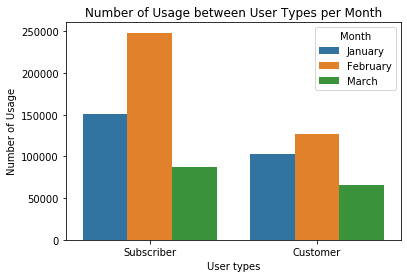

In [14]:
#build the clustered bar chart using 'user_type' and 'start_time'
sns.countplot(data = df, x='user_type', hue='start_time')
plt.title('Number of Usage between User Types per Month')
plt.xlabel('User types')
plt.ylabel('Number of Usage')
plt.legend(title="Month")

### Is there any difference within the access methods in each month?
- the application, on the left, has been decreased from 250,000 in February to less than 100,000 in March. Also, the clipper users has been decreased less than half.

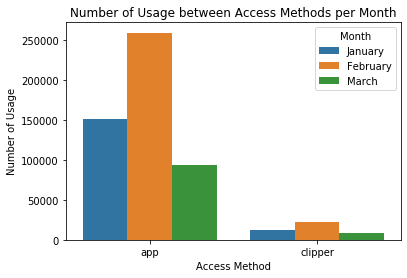

In [15]:
#build the clustered bar chart using 'access_method' and 'start_time'
sns.countplot(data = df, x='rental_access_method', hue='start_time')
plt.title('Number of Usage between Access Methods per Month')
plt.xlabel('Access Method')
plt.ylabel('Number of Usage')
plt.legend(title="Month")

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- As we expected, both of the types in the User Types and the Access Methods have been decreased more than a half.
- **The interesting feature is**, that the number of subscriber users has been decreased more than the general customer. We cannot assure the relationships, but **the long-vast virus situation might have made the users to stop the subscribtion of GoBike**, as well as the usage of the application.
- If it is true, GoBike has to make the original subscribers loyal with events such as discount not to lose them.

## Multivariate Exploration

### What is the duration seconds difference between the user types in each month?
- Both subscribers and the customers have the mode between 250-500 seconds, median between 500-750 seconds.
- It is difficult to say that there is a significant usage duration difference between the subscribers and the customers.

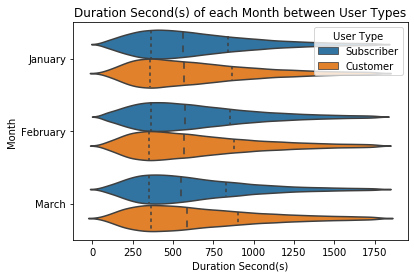

In [16]:
#build the violin plot using 'duration_sec' and 'start_time' divided by 'user_type'
sns.violinplot(data = df, x='duration_sec', y='start_time', inner = "quartile", hue='user_type')
plt.title('Duration Second(s) of each Month between User Types')
plt.xlabel('Duration Second(s)')
plt.ylabel('Month')
plt.legend(title="User Type")

### What is the duration seconds difference between the access methods in each month?

- In every month, clipper users have the shorter bike usage duration than the applcation users' usage.
- Both application and the clipper users slightly have the decreasing usage from February to March.


- When we consider the previous study, that **people do not tend to use GoBike in March, users might try not to go outside.** Even though they need to use the bike, people tend to shorten the time to use the bike and go back home as soon as possible.
- Acorring to the clipper users in March, **when people use the GoBike instantly without the application, they try to use as less as they could.**

In [17]:
#build the violin plot using 'duration_sec' and 'start_time' divided by 'rental_access_method'
sns.violinplot(data = df, x='duration_sec', y='start_time', inner = "quartile", hue='rental_access_method')
plt.title('Duration Second(s) of each Month between Access Methods')
plt.xlabel('Duration Second(s)')
plt.ylabel('Month')
plt.legend(title="Access Method")

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Most of the time, the total amount of usage has been decreased from February to March regardless of the user types or the access methods. Especially, we need to keep in mind that **the subscribers decreased fast, and the clipper users decreased comparably a lot.**

### Were there any interesting or surprising interactions between features?

> The tendency of decreasing in subscribers and the clippers especially means that **people do not see the GoBike in long-term right now.** Because no one knows when will become safe to ride a bike outside. Therefore, **GoBike has to stop losing subscribers and make an idea to make profit to the instant GoBike users.**